# Actividad 2

## 1: Crear un problema de clasificación utilizando la biblioteca sklearn.datasets, que tenga cinco características, dos de ellas redundantes.

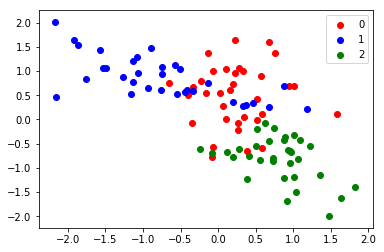

In [6]:
import sklearn
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
%matplotlib inline
#Función de utilidad para dibujar subclases
def plot_scatter_classes(X, Y, labels, colors):
    C = []
    for label in labels:
        selection = Y==label
        C.append(X[selection])
    for idx, subset in enumerate(C):
        plt.scatter(subset[:,0], subset[:,1], color=colors[idx], label=labels[idx])
    plt.legend()


X, Y = sklearn.datasets.make_classification(n_features=5, n_redundant=2, 
                                            n_informative=3, n_classes=3,
                                            n_clusters_per_class=1)

plot_scatter_classes(X, Y, [0,1,2], ["red", "blue", "green"])

## 2: Utilizar varias configuraciones de un árbol de clasificación para crear un modelo, teniendo en cuenta el número de niveles del árbol (puede encontrarse en la documentación de los parámetros de creación del árbol). Exportar a imagen los árboles resultantes e incluirlos en el Notebook

referencia:
http://scikit-learn.org/stable/modules/tree.html#classification

In [7]:
#importando el modelo
from sklearn import tree
#instanciando el modelo
model = tree.DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=7)
#entrenando el modelo
predict_decision = model.fit(X,Y);
#realizando la prediccion
y_predict  =  predict_decision.predict(X)


In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

confusion_matrix(y_true= Y, y_pred= y_predict)

array([[32,  2,  0],
       [ 1, 32,  0],
       [ 3,  0, 30]], dtype=int64)

In [9]:
model.score(X, Y)

0.93999999999999995

In [5]:
import graphviz 
feature_names=["feat1","feat2","feat3","feat4","feat5"]
target_names = ["Piedra","Papel","Tijera"]

#dot_data = tree.export_graphviz(model, out_file=None) 
dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=feature_names,  
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = graphviz.Source(dot_data) 
graph.render("decision") 

'decision.pdf'

![EC2 Logo](images/decisiontree3.png)

## 3: Evaluar esas configuraciones con y sin validación cruzada, y dar una opinión razonada sobre cuál parece ser mejor modelo. 

In [41]:
# Lo mismo que hicimos, en el ejemplo del anterior

## 4: Utilizar un algoritmo de selección de características k-best para tratar de identificar las “mejores” características.

In [18]:
#no tengo idea

In [19]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
nX = sel.fit_transform(X)

In [24]:
nX[:5]

array([[ 0.24325109, -1.5568217 ,  0.48337462,  0.34188243,  2.2450207 ],
       [ 0.7052032 ,  1.34546853,  1.16431278, -1.87614438,  0.5706151 ],
       [-1.0075004 ,  1.71496333,  1.20371688, -2.11127899,  0.28239591],
       [-0.84438118, -1.12202015,  0.07705977,  0.51747471,  1.18741795],
       [ 1.26277864,  0.35909824, -0.07919095, -0.11113541, -0.46656892]])

In [25]:
X[:5]

array([[ 0.24325109, -1.5568217 ,  0.48337462,  0.34188243,  2.2450207 ],
       [ 0.7052032 ,  1.34546853,  1.16431278, -1.87614438,  0.5706151 ],
       [-1.0075004 ,  1.71496333,  1.20371688, -2.11127899,  0.28239591],
       [-0.84438118, -1.12202015,  0.07705977,  0.51747471,  1.18741795],
       [ 1.26277864,  0.35909824, -0.07919095, -0.11113541, -0.46656892]])

In [27]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=2).fit_transform(X, Y)

ValueError: Input X must be non-negative.

referencias:
http://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

## 5:
Re-entrenar los modelos con sólo las características seleccionadas,
evaluarlas con validación cruzada y comparar los resultados entre los
diferentes modelos y con los que se utilizaron sin selección de
características.